This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray CfRadial1 backend

In this example, we read CfRadial1 data files using the `xradar` `cfradial1` backend.

Data is also exported to ODIM_H5 and CfRadial2.

In [1]:
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load CfRadial1 Volume Data

We use the functionality provided now by [xradar](https://docs.openradarscience.org/projects/xradar/en/stable/) to read the CfRadial1 data into a DataTree.

In [2]:
fpath = "netcdf/cfrad.20080604_002217_000_SPOL_v36_SUR.nc"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_cfradial1_datatree(f)

## Inspect RadarVolume

In [3]:
display(vol)

DataTree('root', parent=None)
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 ...
│       platform_type        |S32 ...
│       primary_axis         |S32 ...
│       status_str           |S1 ...
│       instrument_type      |S32 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_7' 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_receiver_bandwidth  float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_beam_width_v        float32 ...
│           radar_beam_width_h        float32 ...
│           radar_antenna_gain_v      float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/45)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
│           receiver_slope_hc         float32 ...
│           receiver_slope_vc         float32 ...
│           receiver_slope_hx         float32 ...
│           receiver_slope_vx         float32 ...
├── DataTree('georeferencing_correction')
│       Dimensions:                            ()
│       Data variables: (12/16)
│           rotation_correction                float32 ...
│           tilt_correction                    float32 ...
│           pressure_altitude_correction       float32 ...
│           elevation_correction               float32 ...
│           radar_altitude_correction          float32 ...
│           latitude_correction                float32 ...
│           ...                                 ...
│           range_correction                   float32 ...
│           pitch_correction                   float32 ...
│           eastward_ground_speed_correction   float32 ...
│           heading_correction                 float32 ...
│           roll_correction                    float32 ...
│           drift_correction                   float32 ...
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
│         * range                      (range) float32 150.0 300.0 ... 1.494e+05
│           elevation                  (azimuth) float32 ...
│         * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
│           latitude                   float64 ...
│           longitude                  float64 ...
│           altitude                   float64 ...
│       Data variables: (12/18)
│           sweep_number               int32 ...
│           sweep_mode                 |S32 ...
│           prt_mode                   |S32 ...
│           follow_mode                |S32 ...
│           sweep_fixed_angle          float32 ...
│     

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

DataTree('root', parent=None)
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 ...
│       platform_type        |S32 ...
│       primary_axis         |S32 ...
│       status_str           |S1 ...
│       instrument_type      |S32 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_7' 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_receiver_bandwidth  float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_beam_width_v        float32 ...
│           radar_beam_width_h        float32 ...
│           radar_antenna_gain_v      float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/45)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
│           receiver_slope_hc         float32 ...
│           receiver_slope_vc         float32 ...
│           receiver_slope_hx         float32 ...
│           receiver_slope_vx         float32 ...
├── DataTree('georeferencing_correction')
│       Dimensions:                            ()
│       Data variables: (12/16)
│           rotation_correction                float32 ...
│           tilt_correction                    float32 ...
│           pressure_altitude_correction       float32 ...
│           elevation_correction               float32 ...
│           radar_altitude_correction          float32 ...
│           latitude_correction                float32 ...
│           ...                                 ...
│           range_correction                   float32 ...
│           pitch_correction                   float32 ...
│           eastward_ground_speed_correction   float32 ...
│           heading_correction                 float32 ...
│           roll_correction                    float32 ...
│           drift_correction                   float32 ...
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
│         * range                      (range) float32 150.0 300.0 ... 1.494e+05
│           elevation                  (azimuth) float32 ...
│         * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
│           latitude                   float64 ...
│           longitude                  float64 ...
│           altitude                   float64 ...
│       Data variables: (12/18)
│           sweep_number               int32 ...
│           sweep_mode                 |S32 ...
│           prt_mode                   |S32 ...
│           follow_mode                |S32 ...
│           sweep_fixed_angle          float32 ...
│     

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="root")
    Dimensions:                    (azimuth: 483, range: 996)
    Coordinates:
        time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
      * range                      (range) float32 150.0 300.0 ... 1.494e+05
        elevation                  (azimuth) float32 ...
      * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
        latitude                   float64 ...
        longitude                  float64 ...
        altitude                   float64 ...
    Data variables: (12/18)
        sweep_number               int32 ...
        sweep_mode                 |S32 ...
        prt_mode                   |S32 ...
        follow_mode                |S32 ...
        sweep_fixed_angle          float32 ...
        pulse_width                (azimuth) timedelta64[ns] ...
        ...                         ...
        r_calib_index              (azimuth) int8 ...
        measured_transmit_power_h  (azimuth) float32 ...
        measured_transmit_power_v  (azimuth) float32 ...
        scan_rate                  (azimuth) float32 ...
        DBZ                        (azimuth, range) float32 ...
        VR                         (azimuth, range) float32 ...

## Georeferencing

``sweep_mode`` is assigned coordinate, as we need it available on the DataArray. We have to properly decode it too.

In [6]:
swp = vol["sweep_0"].ds
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp["sweep_mode"].data = swp["sweep_mode"].item().decode()
swp = swp.wrl.georef.georeference()
display(swp)

<xarray.Dataset>
Dimensions:                    (azimuth: 483, range: 996)
Coordinates: (12/15)
    sweep_mode                 <U20 'azimuth_surveillance'
    time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
  * range                      (range) float32 150.0 300.0 ... 1.494e+05
    elevation                  (azimuth) float32 0.5164 0.5219 ... 0.5219 0.5219
  * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
    latitude                   float64 22.53
    ...                         ...
    y                          (azimuth, range) float32 150.0 ... 1.493e+05
    z                          (azimuth, range) float32 46.0 47.0 ... 2.718e+03
    gr                         (azimuth, range) float32 150.5 ... 1.494e+05
    rays                       (azimuth, range) float32 0.0 0.0 ... 359.2 359.2
    bins                       (azimuth, range) float32 150.0 ... 1.494e+05
    crs_wkt                    int64 0
Data variables: (12/17)
    sweep_number               int32 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    pulse_width                (azimuth) timedelta64[ns] ...
    prt                        (azimuth) timedelta64[ns] ...
    ...                         ...
    r_calib_index              (azimuth) int8 ...
    measured_transmit_power_h  (azimuth) float32 ...
    measured_transmit_power_v  (azimuth) float32 ...
    scan_rate                  (azimuth) float32 ...
    DBZ                        (azimuth, range) float32 ...
    VR                         (azimuth, range) float32 ...

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by Cf/Radial standard.

In [7]:
display(swp.DBZ)

<xarray.DataArray 'DBZ' (azimuth: 483, range: 996)>
[481068 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 'azimuth_surveillance'
    time        (azimuth) datetime64[ns] 2008-06-04T00:15:34 ... 2008-06-04T0...
  * range       (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
    elevation   (azimuth) float32 0.5164 0.5219 0.5164 ... 0.5219 0.5219 0.5219
  * azimuth     (azimuth) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
    latitude    float64 22.53
    ...          ...
    y           (azimuth, range) float32 150.0 300.0 ... 1.492e+05 1.493e+05
    z           (azimuth, range) float32 46.0 47.0 48.0 ... 2.714e+03 2.718e+03
    gr          (azimuth, range) float32 150.5 300.5 ... 1.492e+05 1.494e+05
    rays        (azimuth, range) float32 0.0 0.0 0.0 0.0 ... 359.2 359.2 359.2
    bins        (azimuth, range) float32 150.0 300.0 ... 1.492e+05 1.494e+05
    crs_wkt     int64 0
Attributes:
    long_name:             Computed Horizontal Co-polar Reflectivit
    standard_name:         equivalent_reflectivity_factor
    units:                 dBZ
    threshold_field_name:  
    threshold_value:       -9999.0
    sampling_ratio:        1.0
    grid_mapping:          grid_mapping

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

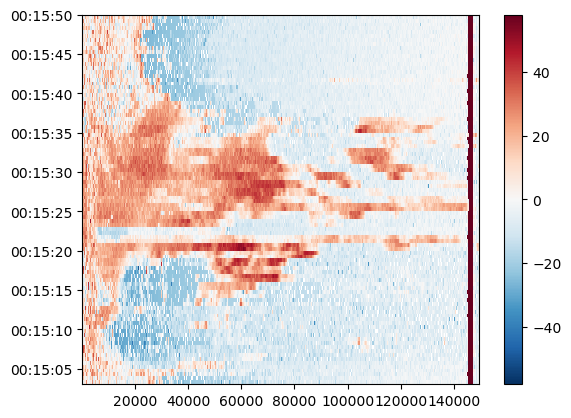

In [8]:
swp.DBZ.sortby("time").plot(x="range", y="time", add_labels=False)

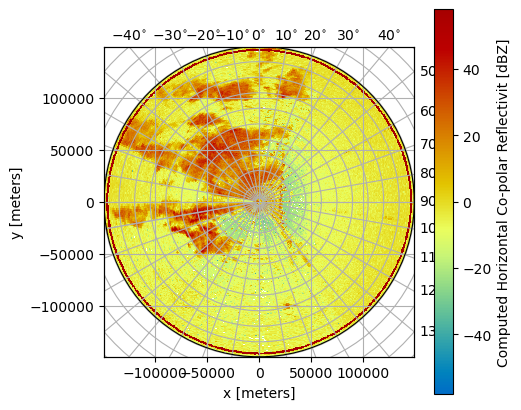

In [9]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZ.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Use `xr.open_dataset` to retrieve explicit group

<div class="alert alert-warning">

**Warning** <br>
    
Since $\omega radlib$ version 2.0 all xarray backend related functionality is imported from [xradar](https://github.com/openradar/xradar)-package.
    
</div>


In [10]:
swp_b = xr.open_dataset(
    f, engine="cfradial1", group="sweep_1", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset>
Dimensions:                    (azimuth: 483, range: 996)
Coordinates:
    time                       (azimuth) datetime64[ns] ...
  * range                      (range) float32 150.0 300.0 ... 1.494e+05
    elevation                  (azimuth) float32 ...
  * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
    latitude                   float64 ...
    longitude                  float64 ...
    altitude                   float64 ...
Data variables: (12/18)
    sweep_number               int32 ...
    sweep_mode                 |S32 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    pulse_width                (azimuth) timedelta64[ns] ...
    ...                         ...
    r_calib_index              (azimuth) int8 ...
    measured_transmit_power_h  (azimuth) float32 ...
    measured_transmit_power_v  (azimuth) float32 ...
    scan_rate                  (azimuth) float32 ...
    DBZ                        (azimuth, range) float32 ...
    VR                         (azimuth, range) float32 ...